<a href="https://colab.research.google.com/github/Isara-Li/ML_Data_Processing/blob/main/Telescope_Data_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ['flenght','fWidth','fSize','fConc','fConel','fAsym','fM3long','fM3Trans','fAlpha','fDist','class']
#pd.read_csv('magic04.data')
pd.read_csv('magic04.data').head() # Gives the first 5 elements
df = pd.read_csv('magic04.data',names=cols)
#print(df)
df.head()
# df -- print them in a more clear way

,flenght,fWidth,fSize,fConc,fConel,fAsym,fM3long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
#df['flenght'].unique()
df['class'].unique()

array([1, 0])

In [ ]:
df['class'] = df['class'].replace({'g': 1, 'h': 0})

In [9]:
#type(df['class'] == 1)
#df[df['class'] == 1]
df[df.columns[:-1]]
len(df) == df.shape[0]
# Standard Way to filter the columns
#df[df['class']==1]
# Standard way to partiiton the columns
#df[df.columns[:-1]] # Columns excluding the last one
# Get the values in the array format
#df[df.columns[:-1]].values

df['fSize'] # values of a column
df['fSize'].values # Array format
df['fSize'].values.reshape(len(df),1) # Reshape process
#df['fAsym','fSize'] # Error
df[['fAsym','fSize']]
df[['fAsym','fSize']].values

array([[  27.7004,    2.6449],
       [  26.2722,    2.5185],
       [ 116.741 ,    4.0612],
       ...,
       [  -9.3561,    3.4483],
       [   5.8043,    3.9939],
       [-167.3125,    3.2093]])

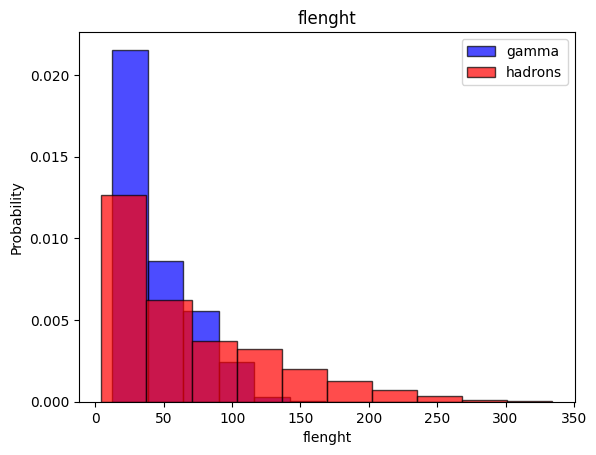

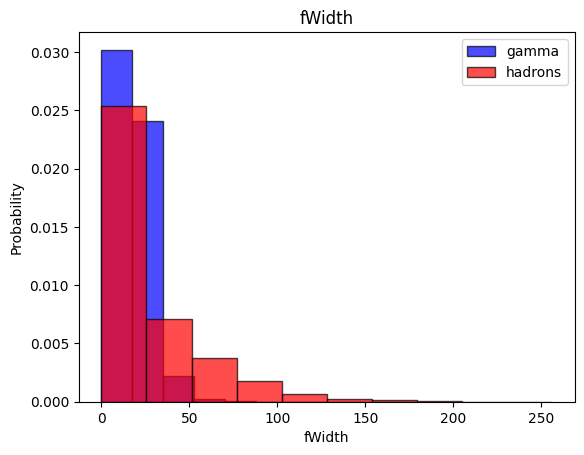

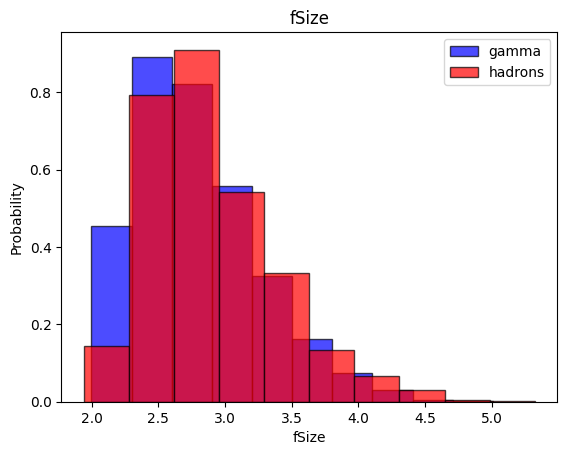

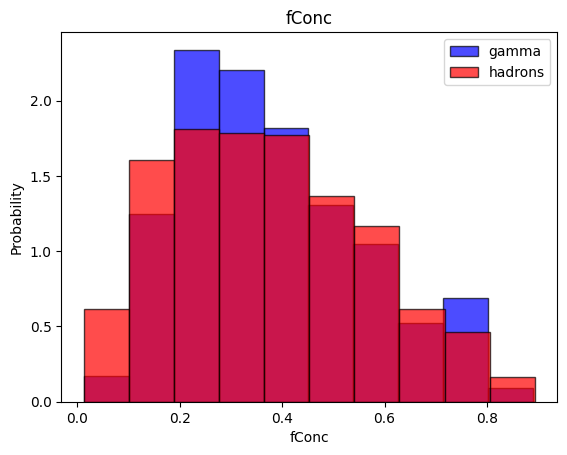

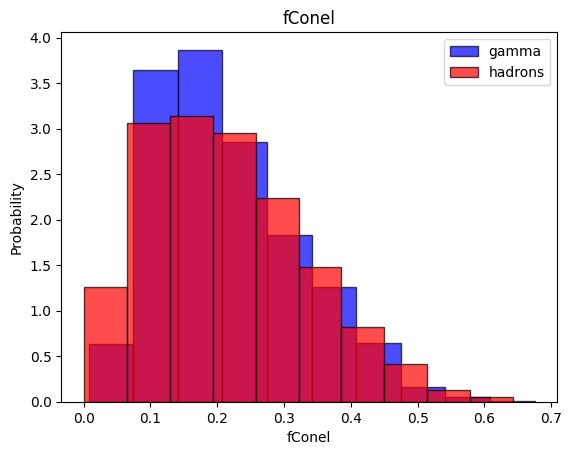

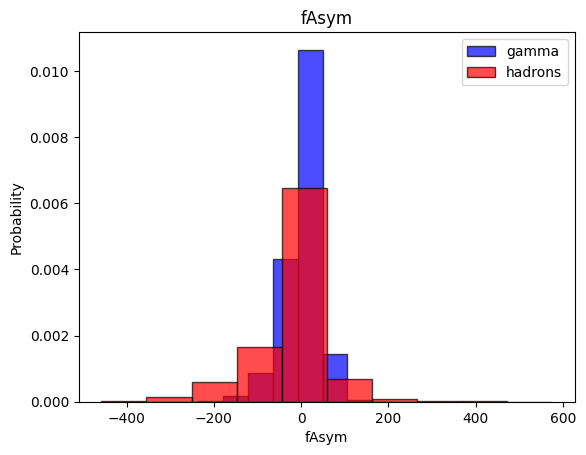

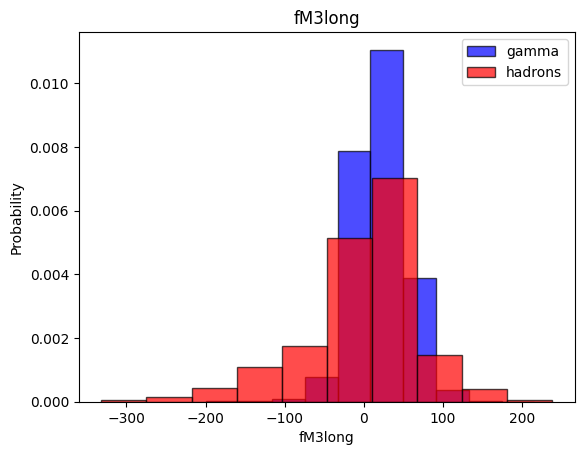

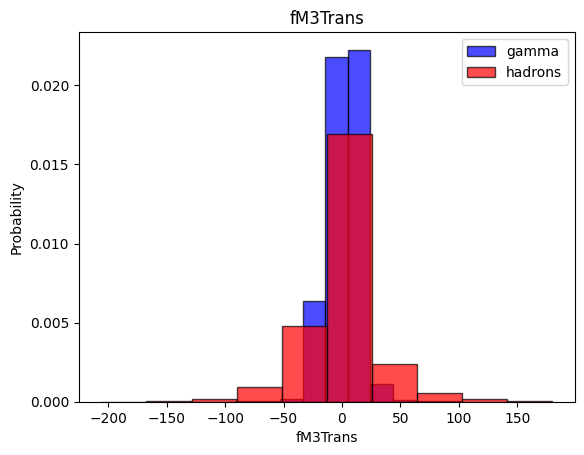

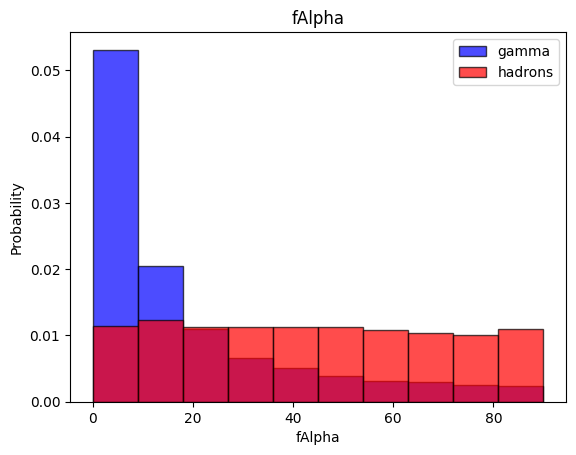

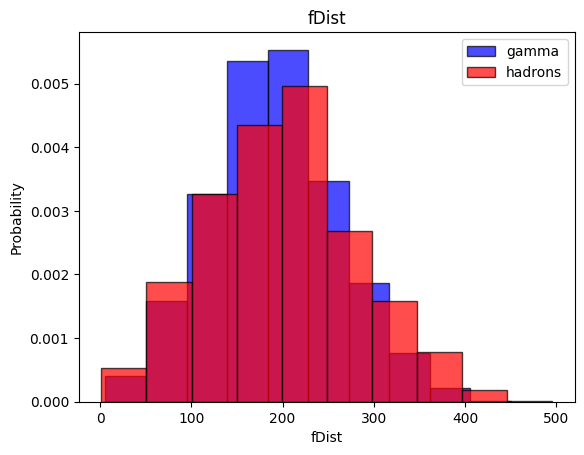

In [ ]:
for feature in cols[:-1]:
  plt.hist(df[df['class']==1][feature],color='blue',label='gamma',alpha=0.7,density=True,ec='black')
  plt.hist(df[df['class']==0][feature],color='red',label='hadrons',alpha=0.7,density=True,ec='black')
  plt.title(feature)
  plt.xlabel(feature)
  plt.ylabel('Probability')
  plt.legend()
  plt.show()

# Train-Validation-Test Datasets



In [ ]:
train,valid,test = np.split(df.sample(frac=1),[int(0.6*df.shape[0]),int(0.8*df.shape[0])])

In [ ]:
train

,flenght,fWidth,fSize,fConc,fConel,fAsym,fM3long,fM3Trans,fAlpha,fDist,class
4008,42.9795,15.9668,2.6253,0.2607,0.1363,9.7417,29.9491,6.8072,10.6030,185.7080,1
3993,21.6757,12.5449,2.3829,0.4928,0.3002,1.6125,-10.5968,2.1647,42.3811,109.2920,1
18639,102.5830,48.8868,3.3461,0.2222,0.1386,-105.3300,47.9325,17.6296,8.8640,331.6950,0
9550,54.7308,21.4952,3.1553,0.2287,0.1220,40.9583,49.3437,-8.4313,5.8810,268.2780,1
5952,37.8325,20.1834,2.5587,0.6906,0.4489,8.6316,-29.3001,-21.6315,64.5250,379.3070,1
...,...,...,...,...,...,...,...,...,...,...,...
3218,30.1393,12.6966,2.6730,0.3524,0.1837,-6.1180,9.4996,3.9710,24.1920,129.9040,1
16121,30.2932,9.8995,2.8739,0.3393,0.1639,37.8472,33.3167,3.4861,38.8759,252.9946,0
18840,99.6354,64.3958,3.3365,0.2350,0.1348,-99.6209,-91.6052,36.0096,6.9690,337.6210,0
2249,33.7304,16.1715,2.7593,0.3359,0.1802,23.1036,30.4307,-13.1286,10.2130,184.0680,1


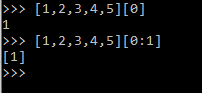 Rember the return types


In [ ]:
#y= df[df.columns[-1]].values
#np.reshape(y,(len(y),1)) # Reshaping example

x= df[df.columns[:-1]].values
y= df[df.columns[-1]].values
print(x.shape,y.shape)


(19020, 10) (19020,)


In [ ]:
def scale_dataset(dataframe,oversample=False):
  x= dataframe[dataframe.columns[:-1]].values
  y= dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x,y = ros.fit_resample(x,y)

  data = np.hstack((x,np.reshape(y,(len(y),1)))) # hstack combines these two array sets. But inorder to merge them their sizes(shapes) should be same, So we use  the resize function
  return data,x,y

In [ ]:
dataf, x_dataf, y_dataf = scale_dataset(df) # Whole dataset
sum(y_dataf == 0) # 6688
sum(y_dataf == 1) #12332

len(df[df['class'] == 1]) #12332

12332

In [ ]:
train, x_train, y_train = scale_dataset(train)
print(len(x_train),len(y_train),sum(y_train == 0),sum(y_train == 1))  # Without oversampling -> 11412 11412 4011 7401

11412 11412 4020 7392


In [ ]:
train, x_train, y_train = scale_dataset(train,True)
print(len(x_train),len(y_train),sum(y_train == 0),sum(y_train == 1)) # With oversampling -> 14842 14842 7421 7421

14818 14818 7409 7409


In [ ]:
train, x_train, y_train = scale_dataset(train,True)
valid, x_valid, y_valid = scale_dataset(valid,False)
test, x_test, y_test = scale_dataset(test,False)

#K-Nearest_Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1324
           1       0.85      0.85      0.85      2480

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.39      0.49      1324
           1       0.73      0.89      0.80      2480

    accuracy                           0.72      3804
   macro avg       0.69      0.64      0.65      3804
weighted avg       0.70      0.72      0.69      3804



#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1324
           1       0.85      0.82      0.83      2480

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.78      0.79      3804



#Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model.fit(x_train,y_train)

SVC()

In [ ]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1324
           1       0.89      0.90      0.89      2480

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804

